# Import Libraries

In [2]:
from surprise.model_selection import cross_validate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"ratings.csv")

## Bar Chart of Rating Vs Their Frequency Count

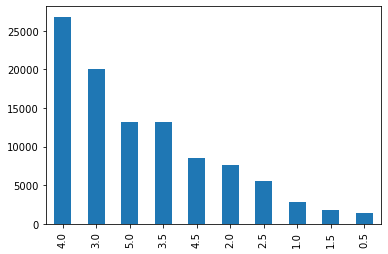

In [3]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [4]:
data

,userId,movieId,rating,timestamp,Reviews
0,1,1,4.0,964982703,Great taffy at a great price.
1,1,3,4.0,964981247,Absolutely wonderful - silky and sexy and comf...
2,1,6,4.0,964982224,Love this dress! it's sooo pretty.
3,1,47,5.0,964983815,I had such high hopes for this dress and reall...
4,1,50,5.0,964982931,"I love, love, love this jumpsuit. it's fun, fl..."
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Warn and super soft. love it!
100832,610,168248,5.0,1493850091,The material is cheap and looks torn. not as n...
100833,610,168250,5.0,1494273047,"Yes, this top runs large and it doesn't show y..."
100834,610,168252,5.0,1493846352,Love this shirt. it fits great and can be easi...


In [5]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

## Import Surprise Models for Custom Dataset Evaluations

In [6]:
from surprise.model_selection import PredefinedKFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise.model_selection import KFold
from surprise.model_selection import GridSearchCV
from surprise import KNNBasic

## Load Custom Dataset

In [8]:
reader = Reader(rating_scale=(1, 5))
data1 = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)


## NormalPredictor

In [9]:
cross_validate(NormalPredictor(), data1, cv=2)

{'test_rmse': array([1.41921349, 1.42914522]),
 'test_mae': array([1.13503009, 1.14269214]),
 'fit_time': (0.08174681663513184, 0.08382010459899902),
 'test_time': (0.33858823776245117, 0.39893293380737305)}

## Baselineonly

In [10]:
cross_validate(BaselineOnly(), data1, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8699  0.8758  0.8593  0.8764  0.8807  0.8724  0.0074  
MAE (testset)     0.6738  0.6740  0.6633  0.6747  0.6771  0.6726  0.0048  
Fit time          0.23    0.24    0.24    0.23    0.32    0.25    0.03    
Test time         0.09    0.08    0.12    0.13    0.24    0.13    0.06    


{'test_rmse': array([0.86991385, 0.87583425, 0.85930886, 0.87640214, 0.88070438]),
 'test_mae': array([0.67380317, 0.67402311, 0.6632699 , 0.67473393, 0.67710732]),
 'fit_time': (0.22635364532470703,
  0.23833966255187988,
  0.23737812042236328,
  0.23141193389892578,
  0.3152458667755127),
 'test_time': (0.0887765884399414,
  0.08278870582580566,
  0.1226646900177002,
  0.12659525871276855,
  0.23737072944641113)}

## kFold

In [11]:
kf = KFold(n_splits=3)

algo = SVD()

for trainset, testset in kf.split(data1):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

RMSE: 0.8771
RMSE: 0.8876
RMSE: 0.8745


## GridSearchCV

In [14]:

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data1)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8939867001478051
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


## KNNBasic

In [13]:
algo = KNNBasic()

cross_validate(algo, data1, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9446  0.9435  0.9462  0.9513  0.9513  0.9474  0.0033  
MAE (testset)     0.7231  0.7227  0.7265  0.7277  0.7299  0.7260  0.0027  
Fit time          0.39    0.45    0.41    0.41    0.41    0.41    0.02    
Test time         3.11    3.03    3.11    3.21    3.02    3.10    0.07    


{'test_rmse': array([0.94455418, 0.9435133 , 0.94620533, 0.95129636, 0.9513399 ]),
 'test_mae': array([0.72313046, 0.72268107, 0.72653662, 0.72770262, 0.72988264]),
 'fit_time': (0.3910024166107178,
  0.44580960273742676,
  0.41089606285095215,
  0.4118993282318115,
  0.41484904289245605),
 'test_time': (3.1076464653015137,
  3.0339252948760986,
  3.111680269241333,
  3.2084219455718994,
  3.019926071166992)}